In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
print(os.listdir("C:/Users/vivek/DataScience_ML_Project/Regression/Logistic Regression/input"))



['fetal_health.csv', 'healthcare_dataset.csv', 'modifiedDigits4Classes.csv', 'modifiedIris2Classes.csv']


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
Health_df  = pd.read_csv('C:/Users/vivek/DataScience_ML_Project/Regression/Logistic Regression/input/fetal_health.csv')

In [5]:
Health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### 1.0 Data Preprocessing and Exploratory Data Analysis
    In this chapter, data preprocessing and exploratory data analysis are the initial steps in the data science workflow. 
    It is a process where a data scientist uses certain python built-in functions to explore the fetal health dataset 
    in order to gain a deeper understanding of the important properties of the data. By doing so, it enables 
    the data scientist to prepare the data according to the insights gained from this step and determine 
    hypotheses that will serve as the basis for further analysis and modeling.

##### 1.1 Data Understanding
    Before building a powerful machine learning model, first getting familiar with the training dataset by 
    understanding all the features found in the dataset is needed.

In [6]:
# general info about the dataset
print("Rows     : " ,Health_df.shape[0])
print("Columns  : " ,Health_df.shape[1])

Rows     :  2126
Columns  :  22


In [7]:
Health_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


#### 1.2 Exploratory Data Analysis
    Exploratory Data Analysis (EDA) can be defined as a process of exploring a fetal health dataset through 
    visualizations to observe if there is any interesting or valuable information. Generally speaking, 
    it is an initial investigation method that aims to use both visual and quantitative methods to understand 
    what the data is telling.

##### 1.2.1 Dependent Variable
    Below is an example of visualizing the target variable ‘fetal health.’

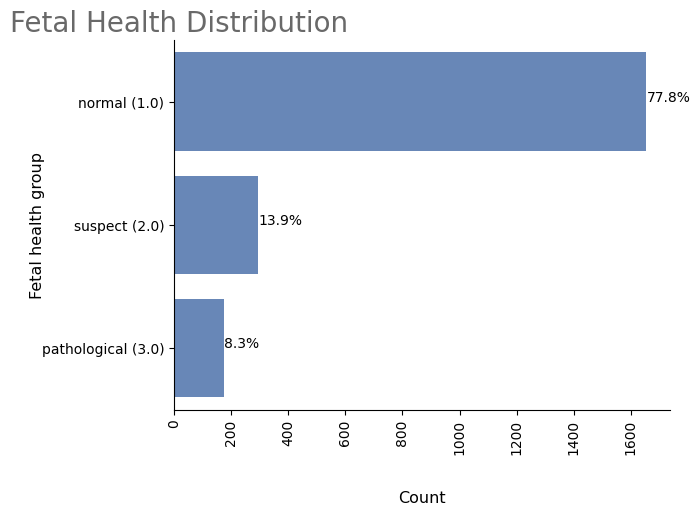

In [8]:
# create a new label for y
labels = ['normal (1.0)', 'suspect (2.0)', 'pathological (3.0)']
ax = sns.countplot(y="fetal_health", data=Health_df, palette = ['#5B84C4'])
ax.set_yticklabels(labels)

# remove frame 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# count percentage
total = len(Health_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.xticks(rotation=90) 

# set labels
plt.title('Fetal Health Distribution', fontdict={'color':'dimgray', 'size': 20}, x=0.01, y=1.0) 
ax.yaxis.set_label_coords(-0.26,2.0)
ax.set_ylabel('Fetal health group', fontsize=11.5)
ax.xaxis.set_label_coords(1.0,-0.22)
ax.set_xlabel('Count', fontsize=11.5)
plt.show()

#### 1.2.2 Independent Variables
    Apart from that, the sample code below is another visualization that displays all the 
    independent variables in histogram form.

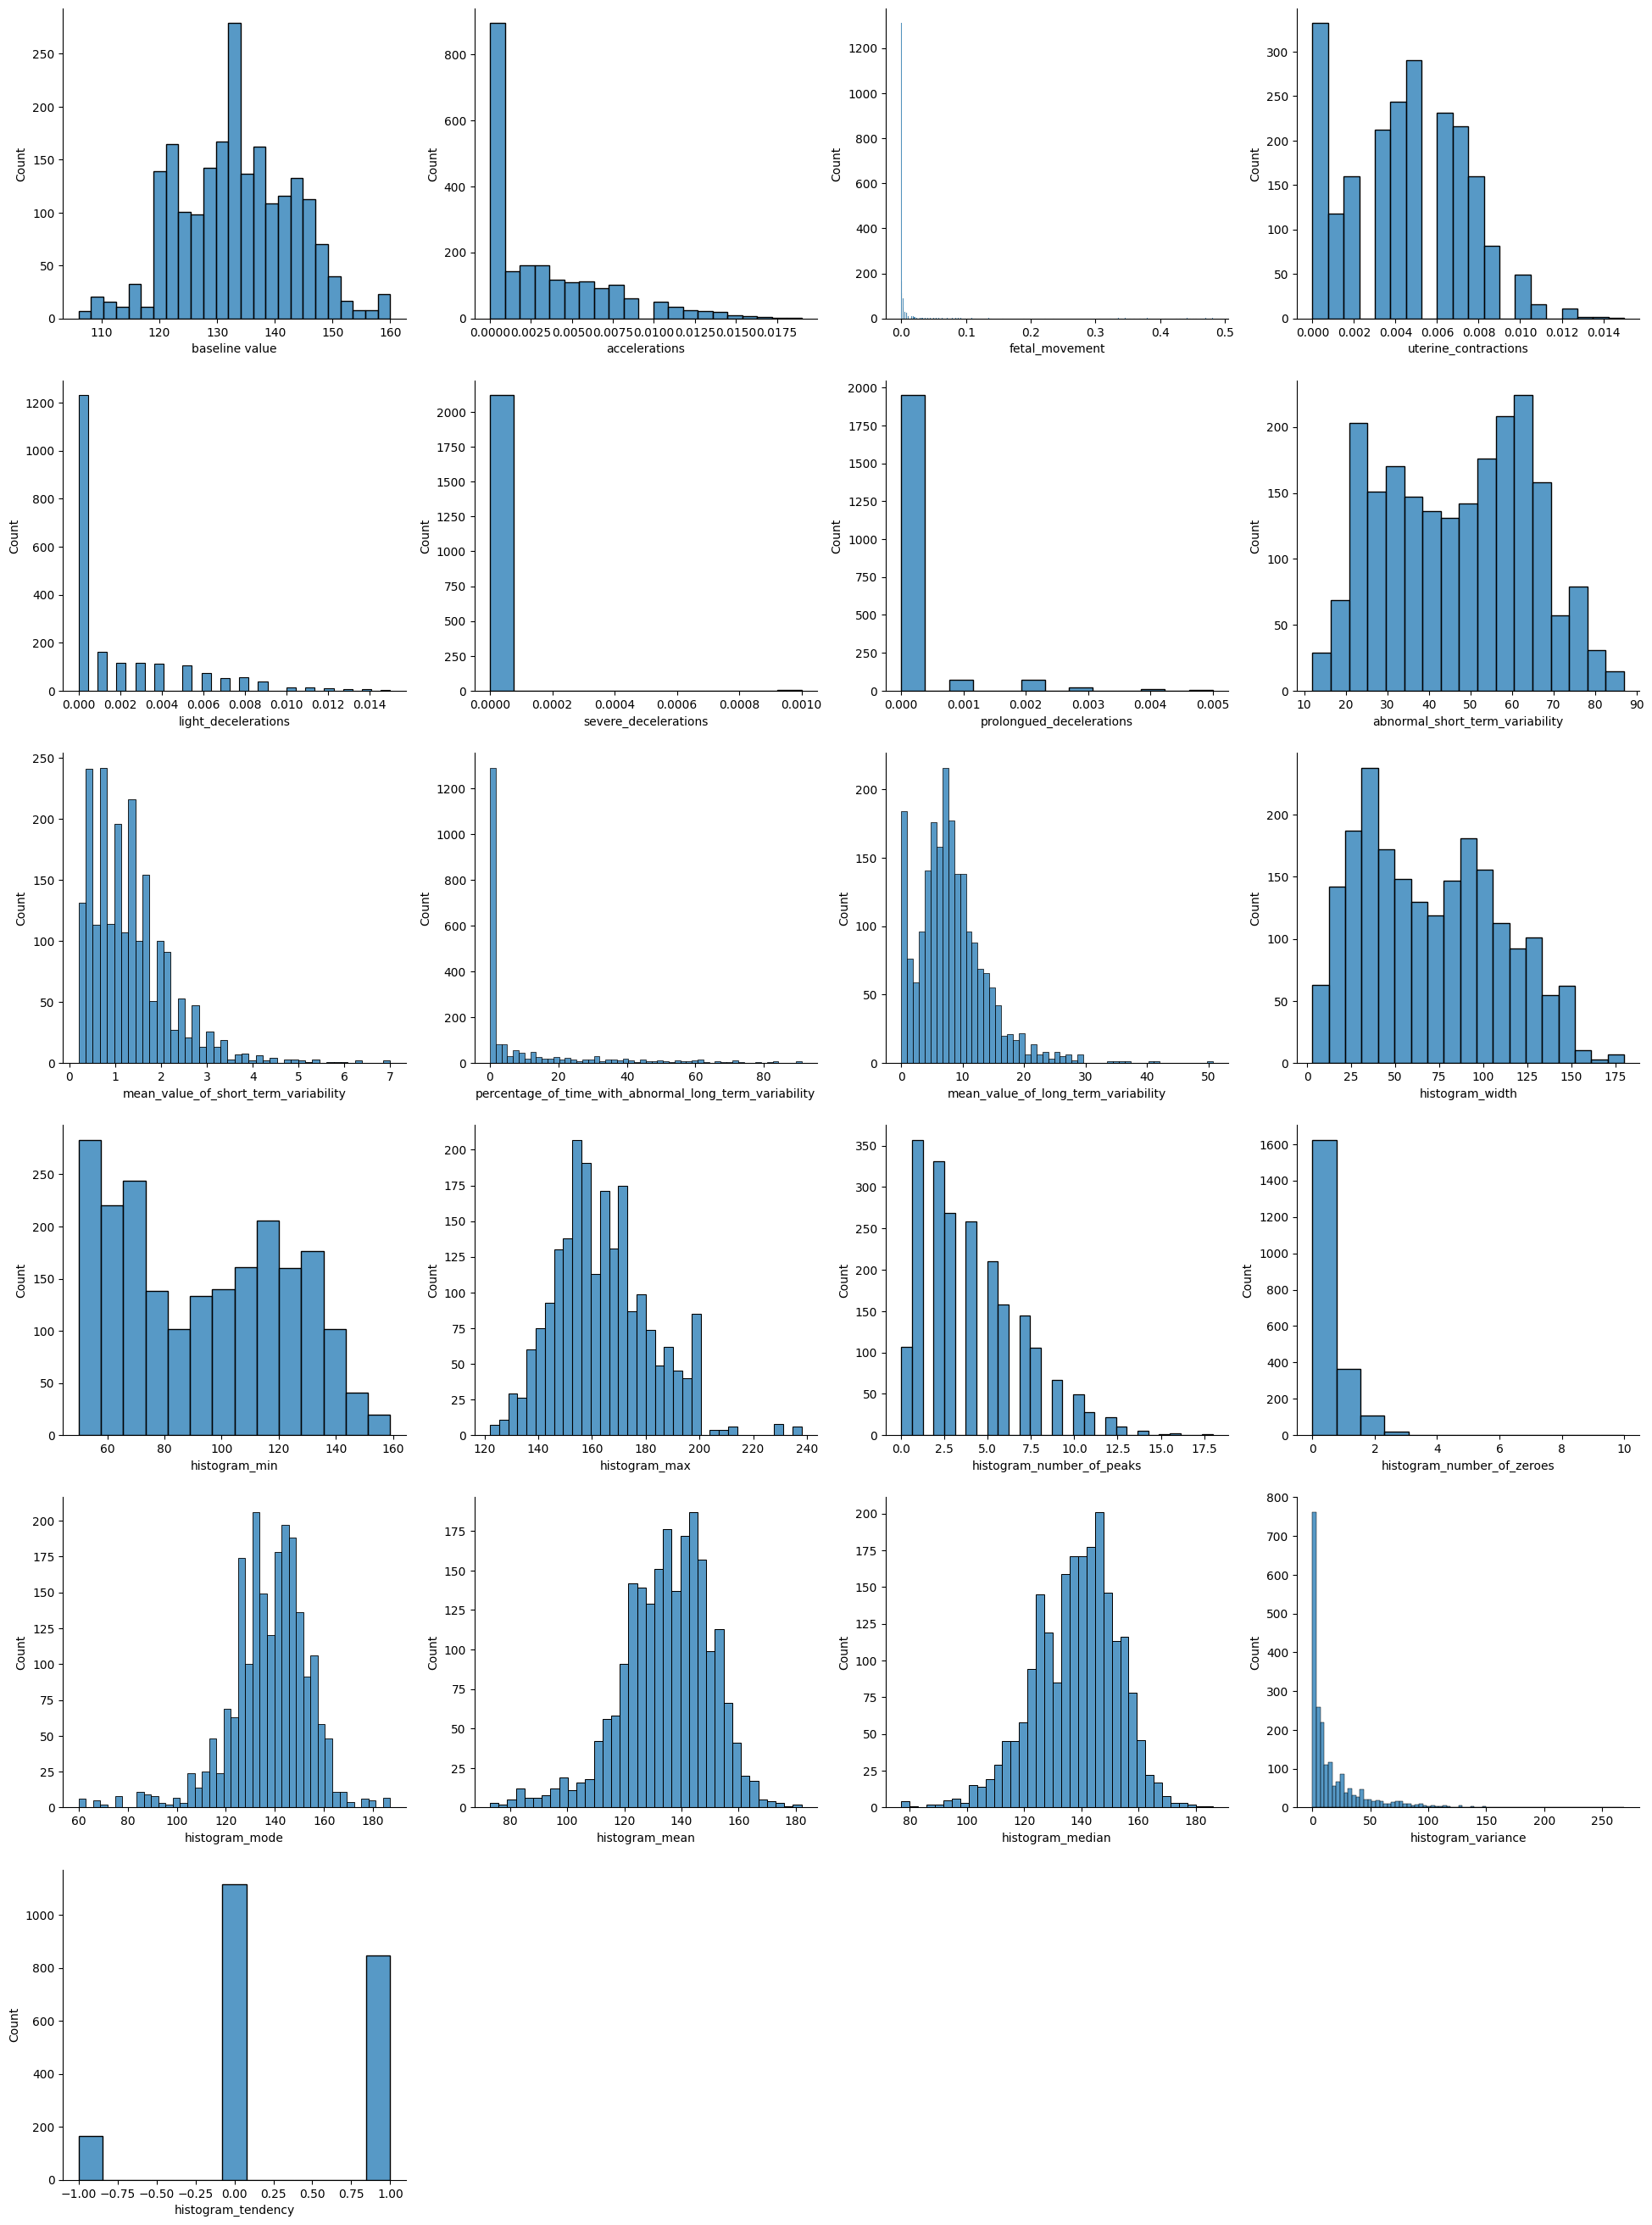

In [9]:
features = Health_df.columns[0:21]
plt.figure(figsize = (24,250))

for i, feature in enumerate(features):
    plt.subplot(44,4,i+1)
    ax = sns.histplot(x = feature, data = Health_df, palette = ['#5B84C4'])
    plt.xlabel(feature)
    #remove top and right frame 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()

#### 1.2.3 Correlation
    Correlation is an important tool that allows data scientists to discover important variables on 
    which other variables depend. It plays a vital role in building machine learning models, enabling 
    data scientists to better understand the degree to which a pair of variables are linearly related. 
    Therefore, in order to know the correlation rate between dependent and independent variables in the 
    fetal health dataset, we can generate a correlation matrix to reveal the interdependencies.

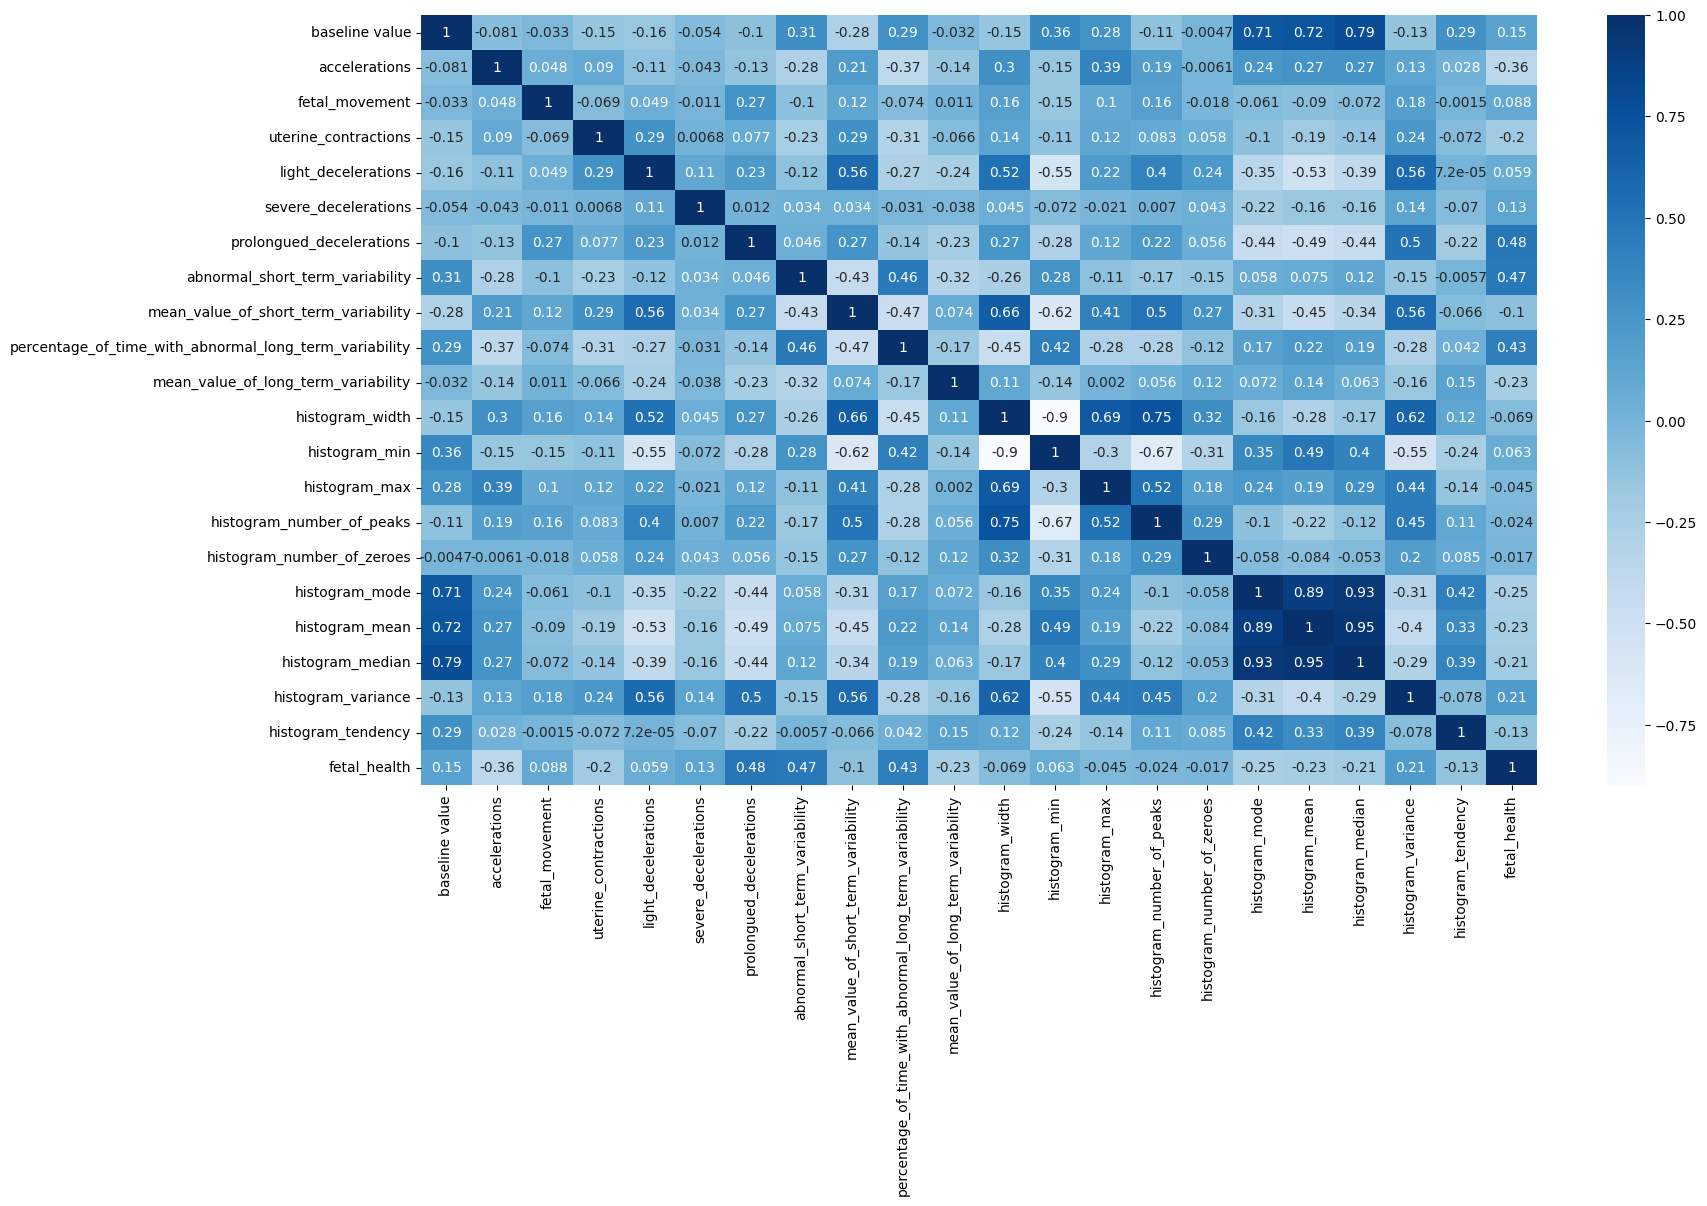

In [10]:
plt.figure(figsize = (18, 10))
sns.heatmap(Health_df.corr(), cmap="Blues", annot = True)
plt.show()

#### 1.3 Data Quality Assessment
    Data quality assessment is the process of scientific and statistical measurement of data quality 
    based on the completeness, consistency, and reliability of the data. This is a procedure that should be 
    performed before developing any model, as most row data will contain certain levels of ‘quality’ issues. 
    Hence, identifying the ‘health’ status of the dataset is an important responsibility of every data scientist. 
    Since the fetal health dataset does not contain string data types, meaning that we are not required 
    to check for inconsistent data. So the following checking process will only focus on incomplete data.

In [11]:
# check missing data
Health_df.isnull().sum(axis = 0)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

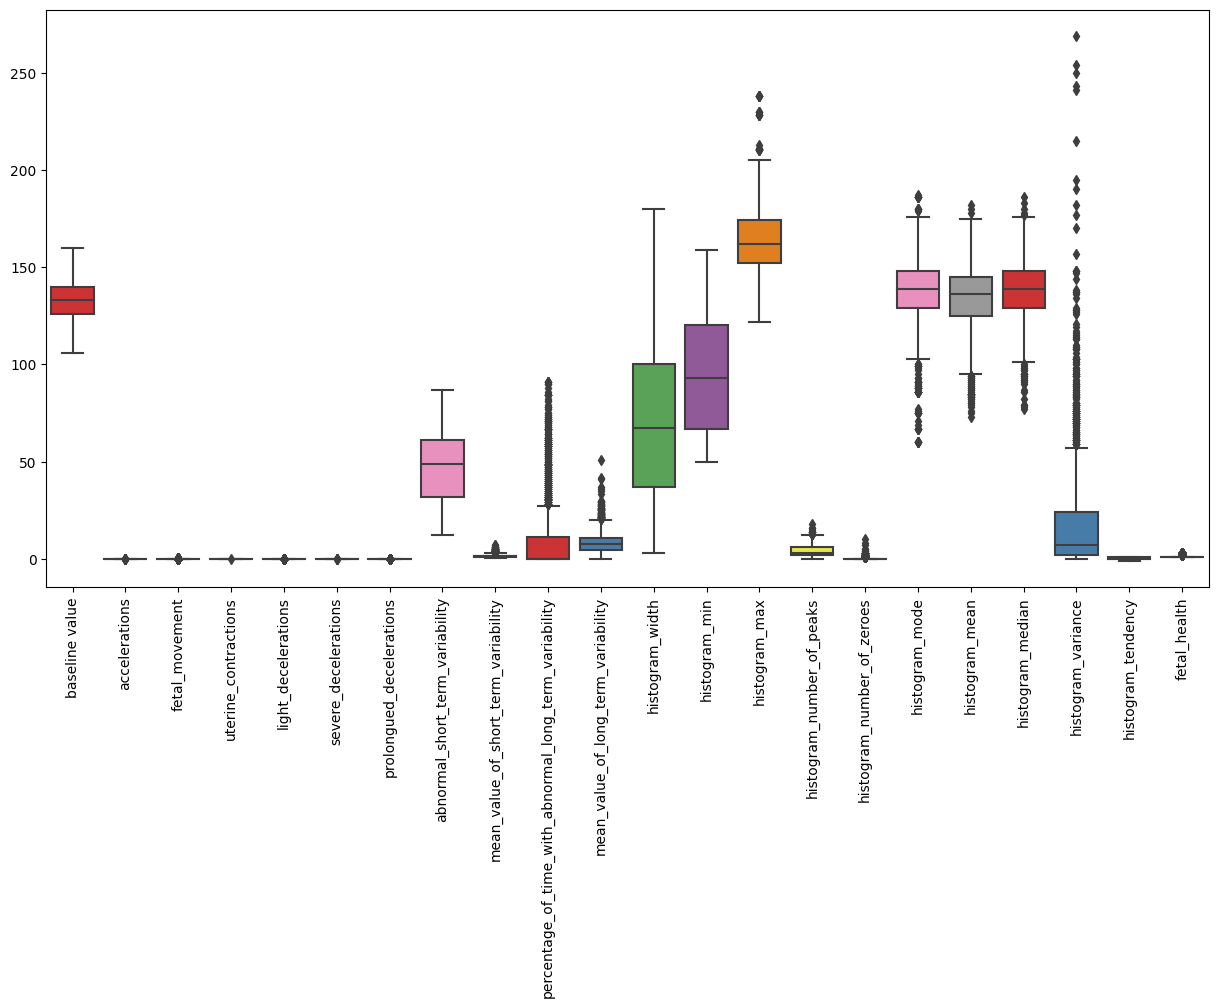

In [12]:
# boxplot - outliers 
plt.figure(figsize=(15,7.5))
sns.boxplot(data = Health_df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

In [13]:
# function to remove outlier
def removeOutlier(att, data):
    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )
    
    data1 = data[(att > lowerbound) & (att < upperbound)]
    print((data.shape[0] - data1.shape[0]), ' number of outliers from ', data.shape[0] )
    print('\n')
    
    data = data1.copy()
    return data

In [14]:
Health_df = removeOutlier(Health_df.mean_value_of_short_term_variability, Health_df)
Health_df = removeOutlier(Health_df.percentage_of_time_with_abnormal_long_term_variability, Health_df)
Health_df = removeOutlier(Health_df.mean_value_of_long_term_variability, Health_df)
Health_df = removeOutlier(Health_df.histogram_max, Health_df)
Health_df = removeOutlier(Health_df.histogram_number_of_peaks, Health_df)
Health_df = removeOutlier(Health_df.histogram_number_of_zeroes, Health_df)
Health_df = removeOutlier(Health_df.histogram_mode, Health_df)
Health_df = removeOutlier(Health_df.histogram_mean, Health_df)
Health_df = removeOutlier(Health_df.histogram_median, Health_df)
Health_df = removeOutlier(Health_df.histogram_variance, Health_df)

lowerbound:  -1.3169394303543431  -------- upperbound:  3.9825085742866104
33  number of outliers from  2126


lowerbound:  -45.50709045903374  -------- upperbound:  65.501357061996
59  number of outliers from  2093


lowerbound:  -8.329017762964922  -------- upperbound:  24.853403210359218
30  number of outliers from  2034


lowerbound:  111.70085851851438  -------- upperbound:  216.2991414814856
13  number of outliers from  2004


lowerbound:  -4.623236358424443  -------- upperbound:  12.674466895842826
15  number of outliers from  1991


lowerbound:  -1.6005361998857088  -------- upperbound:  2.2118722322743727
20  number of outliers from  1976


lowerbound:  88.70470742824477  -------- upperbound:  186.56011874762436
36  number of outliers from  1956


lowerbound:  91.99943556988934  -------- upperbound:  179.09639776344403
18  number of outliers from  1920


lowerbound:  99.84821356792833  -------- upperbound:  178.38207034374358
2  number of outliers from  1902


lowerbound:  -51

In [15]:
Health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [16]:
Health_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1855 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1855 non-null   float64
 1   accelerations                                           1855 non-null   float64
 2   fetal_movement                                          1855 non-null   float64
 3   uterine_contractions                                    1855 non-null   float64
 4   light_decelerations                                     1855 non-null   float64
 5   severe_decelerations                                    1855 non-null   float64
 6   prolongued_decelerations                                1855 non-null   float64
 7   abnormal_short_term_variability                         1855 non-null   float64
 8   mean_value_of_short_term_variability       

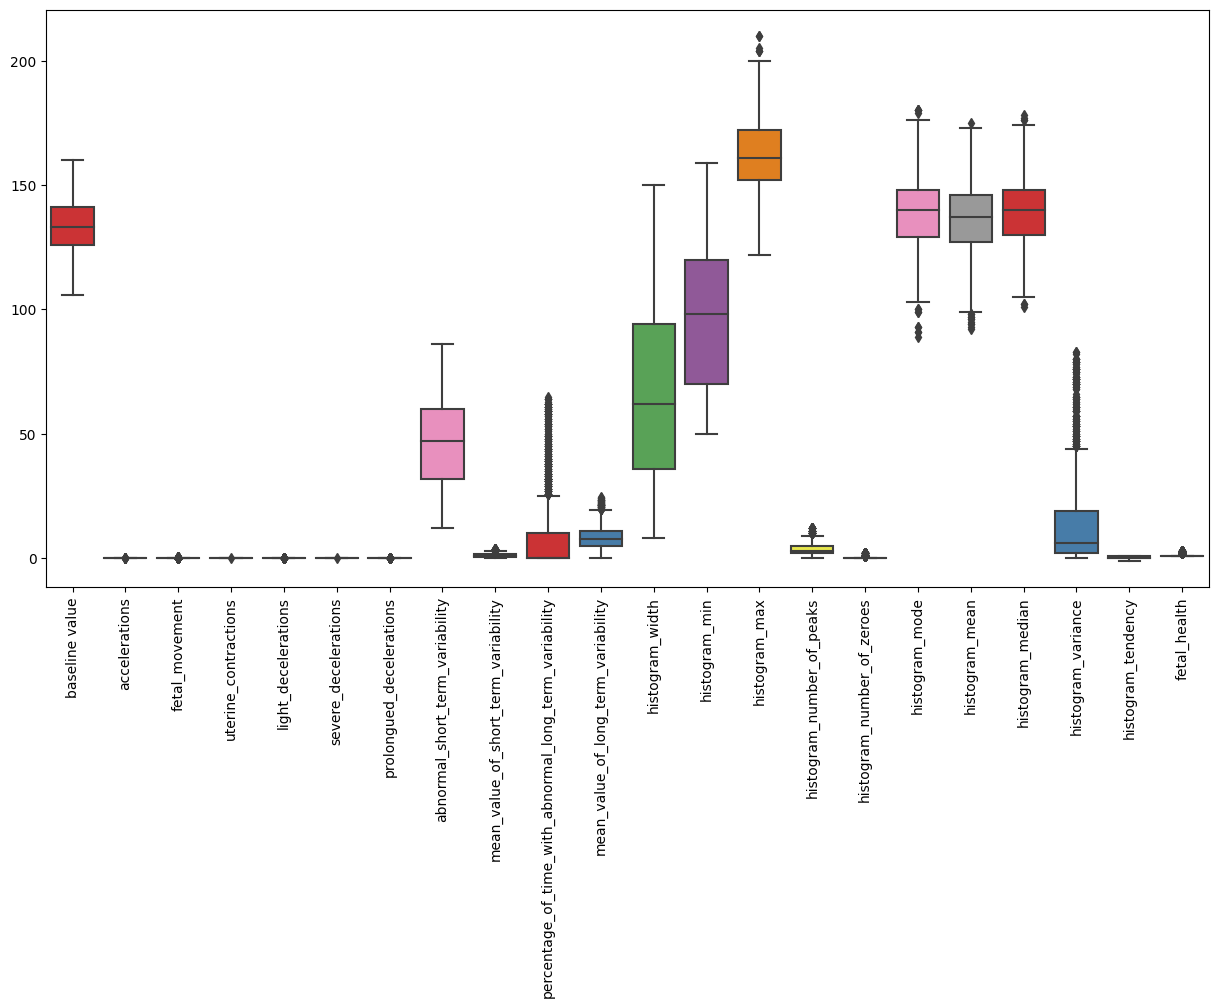

In [17]:
# new boxplot
plt.figure(figsize=(15,7.5))
sns.boxplot(data = Health_df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#### Modelling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *

In [19]:
# Independent Variable (IV)
X = Health_df.drop("fetal_health", axis=1)

# Dependent Variable (DV)   
Y = Health_df["fetal_health"]

In [20]:
print(Y)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 1855, dtype: float64


In [21]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (1484, 21) (1484,)
Test : (371, 21) (371,)


In [22]:
# normalization is needed if there is multiple IV 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression - Gradient Descent / Batch Gradient Descent

In [23]:
# build model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
print("Length of the model classes: ", len(logreg.classes_))
print("Type of the model classes  : ", logreg.classes_)

Length of the model classes:  3
Type of the model classes  :  [1. 2. 3.]


In [25]:
# to see the parameters (default)
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [26]:
print("Intercept (b0)   : ", logreg.intercept_)
print("\nSlope (b1)       : ", logreg.coef_)
print("\nModel accuracy   : ", logreg.score(X_test, y_test)) 

y_pred = logreg.predict(X_test)
print("\nMean sqaure error: ", mean_squared_error(y_test, y_pred))

Intercept (b0)   :  [ 5.52690647  0.20738601 -5.73429248]

Slope (b1)       :  [[-0.47046549  1.67390806 -0.41067786  0.70975971  0.23922387 -0.07907989
  -0.858608   -1.60277903  0.76039118 -0.11748728  0.08124216 -0.06499457
  -0.0631418  -0.25551459  0.17268532 -0.06477591  0.18829687 -0.45693861
   0.55896581 -0.6877555   0.22379884]
 [-1.31058883 -1.36460162  0.03179013  0.03670642  0.00831523 -0.00731748
   0.35632599 -0.66241084 -1.09890191  0.32500216  0.04888145 -0.04362192
   0.02423591 -0.05341641  0.82607846 -0.30207493  1.05613422  0.79431751
   0.43482484 -0.01286813  0.18953779]
 [ 1.78105432 -0.30930644  0.37888774 -0.74646613 -0.2475391   0.08639737
   0.50228201  2.26518987  0.33851073 -0.20751488 -0.13012362  0.10861649
   0.03890589  0.30893101 -0.99876378  0.36685084 -1.24443109 -0.3373789
  -0.99379066  0.70062363 -0.41333663]]

Model accuracy   :  0.9002695417789758

Mean sqaure error:  0.14016172506738545


#### Stochastic Gradient Descent

In [27]:
# build model
clf = SGDClassifier(loss = 'log_loss', max_iter = 100, alpha = 0.001) 
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='log_loss', max_iter=100)

In [28]:
print("Intercept (b0)   : ", clf.intercept_)          
print("\nSlpoe (b1)       : ", clf.coef_)                
print("\nModel accuracy   : ", clf.score(X_test, y_test)) 

y_pred = clf.predict(X_test)
print("\nMean sqaure error: ", mean_squared_error(y_test, y_pred))

Intercept (b0)   :  [  4.60755876  -4.66208327 -29.5072909 ]

Slpoe (b1)       :  [[-8.84140201e-02  2.85455989e+00 -2.80108803e-01  7.12841065e-01
   3.75391960e-01 -3.98932079e-01 -1.16516998e+00 -1.27448439e+00
   8.85836773e-01 -4.30907936e-01  1.00401748e-02  5.97625853e-02
  -3.93465815e-01 -5.65392072e-01 -3.76745972e-01  2.17745068e-01
   3.41867256e-01 -5.72277527e-01 -6.56168174e-02 -1.01951491e+00
  -2.47649308e-01]
 [-7.34401882e-01 -2.46652046e+00  2.19120700e-01 -5.92688804e-01
  -1.08257191e-01 -7.98793597e-02  3.56436367e-01  5.98020893e-01
  -1.62220029e+00  5.25017118e-01 -3.12905421e-03 -6.83468777e-03
   1.00919661e-01  1.63782356e-01  5.77982930e-01 -2.65534239e-01
   1.53697794e+00  2.13313297e-02 -1.14572176e-01  3.61536642e-01
  -5.01543535e-03]
 [ 3.92316046e+00 -4.71265539e+00  2.02096497e+00 -2.51986748e+00
   5.23098262e-01  8.54297668e-01  3.24477127e+00  7.50826882e+00
  -8.23439070e-01 -4.94783858e-01 -1.11881374e+00 -1.12470313e+00
   1.35484823e+00 -8.3

 #### Model Tuning

In [29]:
parameters = {'loss':('hinga', 'log_loss'), 
              'penalty':('l2', 'l1', 'elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1], 
              'max_iter':[1000, 5000, 10000, 20000]}

# build model
gs = SGDClassifier(random_state = 0)
gscv = GridSearchCV(gs, parameters)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('hinga', 'log_loss'),
                         'max_iter': [1000, 5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [30]:
print("Hpyerparameters  : ",gscv.best_params_) # best parameter
print("\nIntercept (b0)   : ", gscv.best_estimator_.intercept_)          
print("\nSlpoe (b1)       : ", gscv.best_estimator_.coef_)                
print("\nModel accuracy   : ", gscv.best_score_) 

y_pred = gscv.predict(X_test)
print("\nMean sqaure error: ", mean_squared_error(y_test, y_pred))

Hpyerparameters  :  {'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l2'}

Intercept (b0)   :  [  4.67327053  -5.09728786 -28.45393351]

Slpoe (b1)       :  [[-4.01800268e-02  2.88592603e+00 -1.44900771e-02  6.37250245e-01
   3.13586317e-01 -1.12845518e+00 -1.14923272e+00 -1.39347441e+00
   8.50628809e-01 -4.98533738e-01  9.06379620e-02  4.84912624e-02
  -4.18547850e-01 -6.34752601e-01 -4.19702951e-01 -6.10798633e-03
   3.79020516e-01 -5.64902342e-01 -2.97791339e-02 -9.82902184e-01
  -7.26864077e-03]
 [-8.52599988e-01 -2.57500726e+00 -1.24503917e-01 -5.49830989e-01
  -7.76201129e-02 -1.19563288e-01  1.39070712e-01  3.86993546e-01
  -1.65369313e+00  3.86131983e-01  3.38554611e-03  1.13583103e-01
   9.35877774e-03  2.67530944e-01  7.18911279e-01 -1.76891260e-01
   1.59090137e+00  9.45283793e-02 -3.55463310e-02  3.56958890e-01
   7.30804732e-02]
 [ 3.85605775e+00 -4.51588471e+00  1.98241819e+00 -2.46135625e+00
   4.55948381e-01  8.10283347e-01  3.25038035e+00  7.28303660

### Model Evaluation

    A series of comparisons and evaluations of each machine learning model will be performed by us. 
    This is to provide an overview of the model performance so that one can understand which algorithm 
    is best for the fetal health dataset.
    
    Below is the evaluation performed by using the confusion matrix.

In [31]:
# view the confusion metrix - logistic regression
from sklearn import metrics


In [32]:
lscore = logreg.score(X_test, y_test)

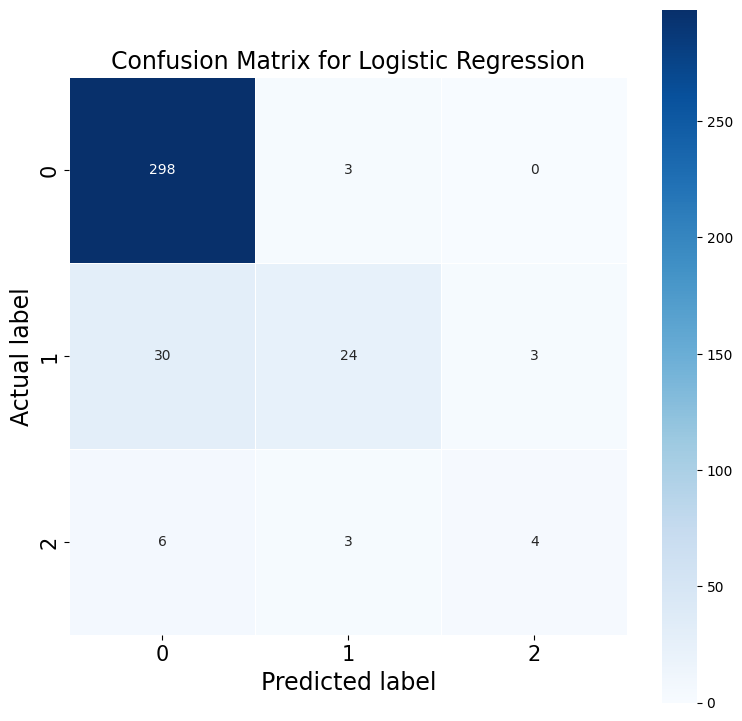

In [33]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Confusion Matrix for Logistic Regression'.format(lscore), size = 17);
plt.tick_params(labelsize= 15)

In [34]:
clf_score = clf.score(X_test, y_test)

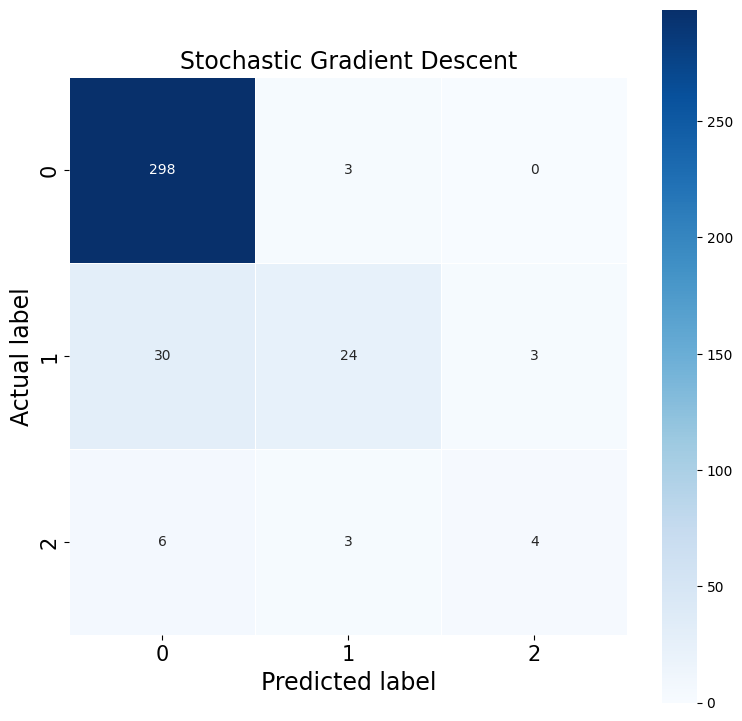

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Stochastic Gradient Descent'.format(clf_score), size = 17);
plt.tick_params(labelsize= 15)

In [36]:
best_scr = gscv.best_score_

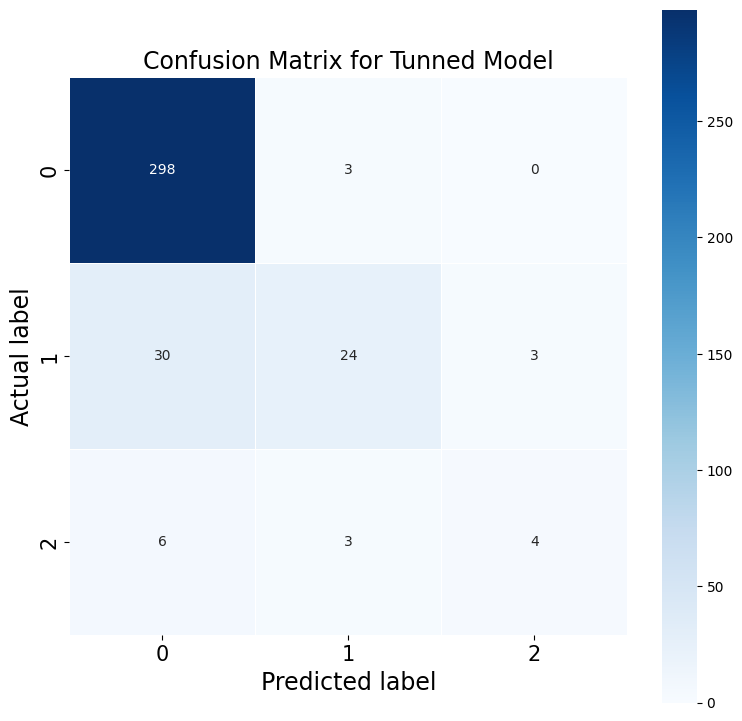

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Confusion Matrix for Tunned Model'.format(best_scr), size = 17);
plt.tick_params(labelsize= 15)

In [38]:
# gradient descent 
preds = logreg.predict(X_test)
print("Accuracy on train data by Logistic Regression: ", accuracy_score(y_train, logreg.predict(X_train))*100)
print("Accuracy on test data by Logistic Regression : ", accuracy_score(y_test, preds)*100, '\n')
# comprehensive report on the classification
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy on train data by Logistic Regression:  92.25067385444744
Accuracy on test data by Logistic Regression :  90.02695417789758 

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.95       301
         2.0       0.82      0.56      0.67        57
         3.0       0.75      0.46      0.57        13

    accuracy                           0.90       371
   macro avg       0.83      0.67      0.73       371
weighted avg       0.89      0.90      0.89       371



In [39]:
# stochastic gradient descent
preds = clf.predict(X_test)
print("Accuracy on train data by Stochastic Gradient Descent: ", accuracy_score(y_train, clf.predict(X_train))*100)
print("Accuracy on test data by Stochastic Gradient Descent : ", accuracy_score(y_test, preds)*100, '\n')
# comprehensive report on the classification
print(classification_report(y_test, clf.predict(X_test)))

Accuracy on train data by Stochastic Gradient Descent:  91.77897574123989
Accuracy on test data by Stochastic Gradient Descent :  90.02695417789758 

              precision    recall  f1-score   support

         1.0       0.91      0.99      0.95       301
         2.0       0.80      0.58      0.67        57
         3.0       0.80      0.31      0.44        13

    accuracy                           0.90       371
   macro avg       0.84      0.62      0.69       371
weighted avg       0.89      0.90      0.89       371



In [40]:
preds = gscv.predict(X_test)
print("Accuracy on train data by Tuned Model: ", accuracy_score(y_train, gscv.predict(X_train))*100)
print("Accuracy on test data by Tuned Model : ", accuracy_score(y_test, preds)*100, '\n')
# comprehensive report on the classification
print(classification_report(y_test, gscv.predict(X_test)))

Accuracy on train data by Tuned Model:  91.98113207547169
Accuracy on test data by Tuned Model :  87.87061994609164 

              precision    recall  f1-score   support

         1.0       0.89      0.99      0.94       301
         2.0       0.80      0.42      0.55        57
         3.0       0.57      0.31      0.40        13

    accuracy                           0.88       371
   macro avg       0.75      0.57      0.63       371
weighted avg       0.87      0.88      0.86       371

